In [202]:
import pandas as pd

In [203]:
dataFrame = pd.read_excel('bisiklet_fiyatlari.xlsx')

In [204]:
dataFrame

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [205]:
dataFrame.head() # ilk 5 satırı getirir

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [206]:
import seaborn as sbn
import matplotlib.pyplot as plt

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


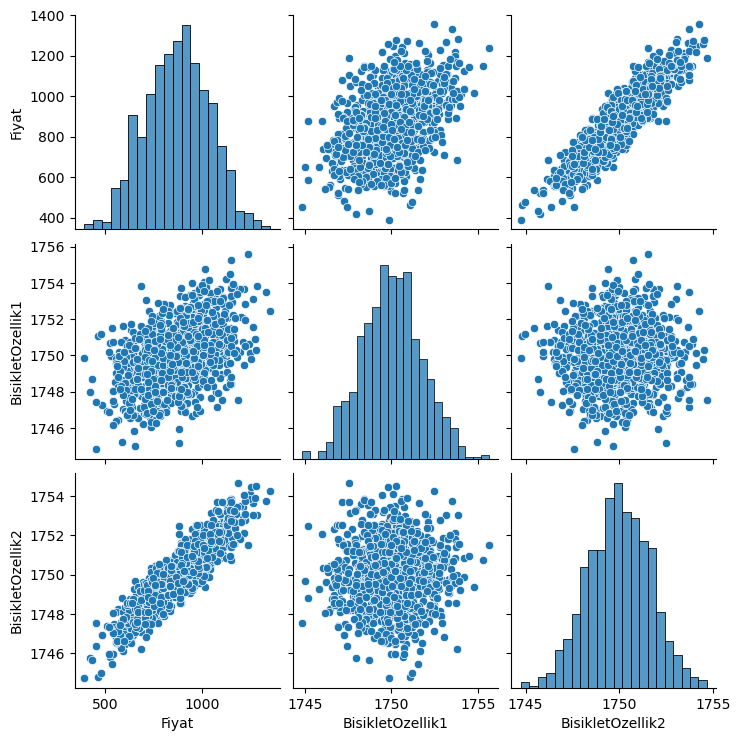

In [207]:
sbn.pairplot(dataFrame) # verilerin birbirleri ile olan ilişkilerini gösterir

## veriyi test/train olarak ikiye ayırmak

In [208]:
from sklearn.model_selection import train_test_split

In [209]:

dataFrame

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


## y = wx + b
## y -> label
## x -> feature (özellik)

In [210]:
y = dataFrame["Fiyat"].values
x = dataFrame[["BisikletOzellik1", "BisikletOzellik2"]].values


In [211]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=15) # verileri train ve test olarak ayırır

In [212]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [213]:
x_train.shape 

(670, 2)

In [214]:
x_test.shape 

(330, 2)

In [215]:
y_train.shape 

(670,)

In [216]:
y_test.shape 

(330,)

## scaling : bütün veriyi 0 ile 1 arasında dağıtır

In [217]:
from sklearn.preprocessing import MinMaxScaler

In [218]:
scaler = MinMaxScaler()

In [219]:
scaler.fit(x_train) # x_train verilerini ölçeklendirir

MinMaxScaler()

In [220]:
x_train = scaler.transform(x_train) # x_train verilerini ölçeklendirir

In [221]:
x_test = scaler.transform(x_test) # x_test verilerini ölçeklendirir

In [222]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [223]:
import tensorflow as tf

In [224]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [225]:
model = Sequential() # model oluşturur

In [226]:
model.add(Dense(4,activation="relu")) # 4 nöronlu gizli katman ekler
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1)) # çıktı katmanı ekler

model.compile(optimizer="rmsprop",loss="mse") # modeli derler ve hata hesaplama fonksiyonu olarak ortalama kare hatasını kullanır

## model eğitimi

In [227]:
model.fit(x_train,y_train,epochs=250) # modeli eğitir

Epoch 1/250


21/21 [==============================] - 1s 1ms/step - loss: 795904.1250
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795812.5625
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 795735.0625
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 795634.7500
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 795501.0000
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 795332.6250
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 795131.4375
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 794896.6875
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 794624.1250
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 794313.3125
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 793955.8750
Epoch 12/250
21/21 [==============================] - 0s 2ms/step - loss: 7

In [228]:
model.history.history # modelin eğitim sürecini gösterir

{'loss': [795904.125,
  795812.5625,
  795735.0625,
  795634.75,
  795501.0,
  795332.625,
  795131.4375,
  794896.6875,
  794624.125,
  794313.3125,
  793955.875,
  793546.875,
  793080.875,
  792548.125,
  791950.75,
  791278.0625,
  790529.5,
  789697.875,
  788768.0,
  787733.1875,
  786585.0,
  785318.0625,
  783916.875,
  782377.625,
  780700.625,
  778868.0625,
  776873.625,
  774700.5,
  772354.75,
  769813.1875,
  767072.0,
  764132.75,
  760970.4375,
  757586.5625,
  753971.1875,
  750094.9375,
  745978.625,
  741582.8125,
  736894.5,
  731947.375,
  726692.8125,
  721133.6875,
  715309.3125,
  709114.9375,
  702588.0,
  695755.75,
  688525.625,
  680930.3125,
  672954.375,
  664562.9375,
  655718.4375,
  646486.8125,
  636823.1875,
  626664.8125,
  615983.3125,
  604937.6875,
  593352.9375,
  581294.0,
  568880.9375,
  555924.75,
  542545.75,
  528702.6875,
  514384.34375,
  499615.03125,
  484436.0,
  468761.46875,
  452736.65625,
  436325.78125,
  419492.1875,
  402326.343

<Axes: >

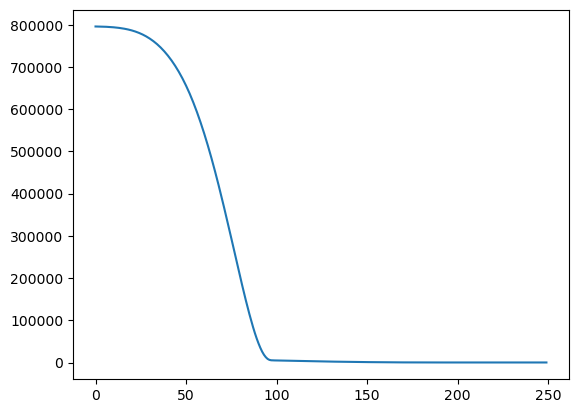

In [229]:
sbn.lineplot(x=range(len(model.history.history["loss"])),y=model.history.history["loss"]) # modelin eğitim sürecini gösterir

In [230]:
trainScore = model.evaluate(x_train,y_train) # modelin eğitim verileri ile hata hesaplar

21/21 [==============================] - 0s 1ms/step - loss: 75.9339


In [231]:
testScore = model.evaluate(x_test,y_test) # modelin test verileri ile hata hesaplar

11/11 [==============================] - 0s 1ms/step - loss: 85.0035


In [232]:
testTahminleri = model.predict(x_test) # modelin test verileri ile tahmin yapar

11/11 [==============================] - 0s 2ms/step


In [233]:
testTahminleri

array([[1075.8326 ],
       [ 622.3763 ],
       [ 874.36743],
       [ 892.50305],
       [ 897.7647 ],
       [ 450.34872],
       [ 929.34656],
       [ 989.5764 ],
       [ 939.3586 ],
       [1014.8861 ],
       [ 749.33777],
       [ 916.05756],
       [ 945.71295],
       [1052.7551 ],
       [1119.4114 ],
       [ 680.0706 ],
       [1124.9856 ],
       [ 649.5069 ],
       [1152.5851 ],
       [ 884.78735],
       [ 891.06415],
       [ 715.20386],
       [ 455.58328],
       [ 610.63995],
       [ 833.3    ],
       [1089.2131 ],
       [ 712.2459 ],
       [ 755.30493],
       [ 871.7642 ],
       [ 769.0208 ],
       [ 450.0601 ],
       [ 781.41675],
       [ 726.72784],
       [ 645.3636 ],
       [ 884.9931 ],
       [ 842.11084],
       [1033.812  ],
       [1020.9318 ],
       [ 843.22064],
       [ 860.51715],
       [ 755.54346],
       [1172.5358 ],
       [1095.6283 ],
       [1085.8412 ],
       [ 871.4011 ],
       [ 595.21246],
       [1143.76   ],
       [ 971.

In [234]:
tahminDataFrame = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [235]:
tahminDataFrame

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [236]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [237]:
testTahminleri

0      1075.832642
1       622.376282
2       874.367432
3       892.503052
4       897.764709
          ...     
325    1011.660278
326     789.201721
327     764.343079
328    1165.515869
329     801.139343
Length: 330, dtype: float32

In [238]:
tahminDataFrame = pd.concat([tahminDataFrame,testTahminleri],axis=1)

In [239]:
tahminDataFrame

,Gerçek Y,0
0,1081.652164,1075.832642
1,622.675990,622.376282
2,889.356810,874.367432
3,902.826733,892.503052
4,897.662404,897.764709
...,...,...
325,1028.438035,1011.660278
326,789.934950,789.201721
327,758.490486,764.343079
328,1172.871659,1165.515869


In [240]:
tahminDataFrame.columns = ["Gerçek Y","Tahmin Y"]

In [241]:
tahminDataFrame

,Gerçek Y,Tahmin Y
0,1081.652164,1075.832642
1,622.675990,622.376282
2,889.356810,874.367432
3,902.826733,892.503052
4,897.662404,897.764709
...,...,...
325,1028.438035,1011.660278
326,789.934950,789.201721
327,758.490486,764.343079
328,1172.871659,1165.515869


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

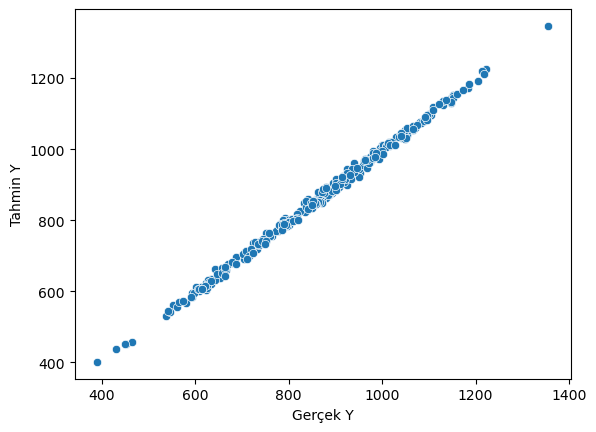

In [242]:
sbn.scatterplot(x="Gerçek Y",y="Tahmin Y",data=tahminDataFrame) # gerçek ve tahmin edilen değerleri gösterir

In [243]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_squared_error

In [244]:
mean_absolute_error(tahminDataFrame["Gerçek Y"],tahminDataFrame["Tahmin Y"]) # ortalama mutlak hata

7.402076966982716

In [245]:
dataFrame.describe() # verilerin istatistiksel özelliklerini gösterir

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [249]:
yeniBisikletOzellikleri = [[1753,1755]] # yeni bir bisiklet özelliği

In [250]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri) # yeni bisiklet özelliğini ölçeklendirir

In [251]:
model.predict(yeniBisikletOzellikleri) # yeni bisiklet özelliğine göre tahmin yapar

1/1 [==============================] - 0s 30ms/step


array([[1434.9971]], dtype=float32)

In [252]:
model.save("bisiklet_modeli.h5") # modeli kaydeder

C:\Users\derin\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [253]:
from tensorflow.keras.models import load_model # modeli yükler

In [254]:
sonradanYuklenenModel = load_model("bisiklet_modeli.h5") # modeli yükler

In [255]:
sonradanYuklenenModel 